In [1]:
import csv
import pathlib
import requests
from astropy.io import fits
import astropy.stats
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from lsst.ts import salobj
import SALPY_Electrometer
import datetime

Could not import lsstcppimport; please ensure the base package has been built (not just setup).



In [10]:
!conda list

# packages in environment at /opt/lsst/software/stack/python/miniconda3-4.3.21:
#
# Name                    Version                   Build  Channel
alabaster                 0.7.12                   pypi_0    pypi
asn1crypto                0.22.0                   py36_0  
astropy                   2.0.1               np113py36_0  
babel                     2.6.0                    pypi_0    pypi
backcall                  0.1.0                    py36_0  
blas                      1.0                    openblas  
bleach                    3.1.0                    pypi_0    pypi
bottleneck                1.2.1               np113py36_0  
breathe                   4.4.0                    pypi_0    pypi
ca-certificates           2018.12.5                     0  
certifi                   2018.11.29               py36_0  
cffi                      1.10.0                   py36_0  
chardet                   3.0.4                    py36_1  
click                     6.7                  

In [3]:
import asyncio
import logging
        
from lsst.ts import salobj
from lsst.ts.standardscripts.auxtel import calsys_take_narrowband_data

async def main(index):
    script = calsys_take_narrowband_data.CalSysTakeNarrowbandData(index=index)
    script.log.setLevel(logging.INFO)
    script.log.addHandler(logging.StreamHandler())
    print("*** configure")
    config_data = script.cmd_configure.DataType()
    config_data.config = """wavelengths:
    - 432.0
    integration_times:
    - 1.0
    fiber_spectrograph_integration_times:
    - .2
    mono_exit_slit_widths: .15
    mono_entrance_slit_widths: 0.4
    latiss_filter: 0
    file_location: "~/develop/calsys_take_narrowband_data_fits_files"
    setup_spectrograph: False"""
    config_id_data = salobj.CommandIdData(1, config_data)
    await script.do_configure(config_id_data)
    print("*** run")
    await script.do_run(None)
    print("*** done")
asyncio.get_event_loop().run_until_complete(main(index=1))

/opt/rh/devtoolset-6/root/usr/lib64/python2.7/site-packages:/opt/rh/devtoolset-6/root/usr/lib/python2.7/site-packages:/home/saluser/repos/ts_scriptqueue/python:/home/saluser/repos/ts_salobj/python:/home/saluser/repos/ts_sal/python:/opt/lsst/software/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/meas_mosaic/16.0+1/python:/opt/lsst/software/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/treecorr/3.2.3.lsst3+2/lib/python:/opt/lsst/software/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/validate_drp/16.0+1/python:/opt/lsst/software/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/cp_pipe/16.0+1/python:/opt/lsst/software/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/display_matplotlib/16.0+1/python:/opt/lsst/software/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/ws4py/0.4.2+3/lib/python:/opt/lsst/software/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/firefly_client/lsst-dev-gce6eb6a399/lib/python:/opt/lsst/software/stack/stack/miniconda3-4.3.21-10a4fa6/Linux64/display_firefly/16.0+1/python:/opt/

In [142]:
with open("laser_stablization.txt","r") as f, open("laser_stablization_plot.txt","w") as ldf:
    for line in f:
        ldf.write(line)

In [143]:
with open(f"laser_stablization_plot.txt",newline='') as csvfile:
            data_reader = csv.DictReader(csvfile)
            timestamps = []
            fits_file = []
            for row in data_reader:
                electrometer_url = row["fits_file"]
                electrometer_url_name = electrometer_url.split("/")[-1]
                electrometer_fits_request = requests.get(electrometer_url)
                with open(f"/home/saluser/develop/es_stablization_laser_fits_files/electrometer_fits_files/{electrometer_url_name}","wb") as file:
                    file.write(electrometer_fits_request.content)
                timestamp = row["timestamp"]
                timestamps.append(timestamp)
                fits_file.append(electrometer_url_name)

In [144]:
p = pathlib.Path("/home/saluser/develop/es_stablization_laser_fits_files/electrometer_fits_files")
l = fits_file
print("something")
xtime=[]
xtime_filtered = []
yintensity_filtered=[]
yintensity_std= []
yintensity=[]

for index,f in enumerate(l):
    print(f)
    hdul = fits.open(p.joinpath(f))
    data=hdul[0].data
    xtime_this_file = []
    yintensity_this_file = []
    for time in data[0]:
        xtime.append(float(timestamps[index])+time)
        xtime_this_file.append(time)
        
    for intensity in data[1]:
        yintensity.append(intensity)
        yintensity_this_file.append(intensity)
    
    xtime_filtered.append(np.median(xtime_this_file)+float(timestamps[index])-float(timestamps[0]) )
    yintensity_filtered.append(np.median(yintensity_this_file))
    yintensity_std.append(np.std(yintensity_this_file))


something
1-1553891561.109049.fits
1-1553891648.202404.fits
1-1553891735.389775.fits
1-1553891822.558959.fits
1-1553891909.728268.fits
1-1553892019.816102.fits
1-1553892106.973589.fits
1-1553892194.152036.fits
1-1553892281.311185.fits
1-1553892368.466548.fits
1-1553892455.639558.fits
1-1553892542.795163.fits
1-1553892629.937869.fits
1-1553892717.0971.fits
1-1553892804.200704.fits
1-1553892891.352299.fits
1-1553892978.526899.fits
1-1553893065.682042.fits
1-1553893152.845093.fits
1-1553893239.989451.fits
1-1553893327.129567.fits
1-1553893414.304534.fits
1-1553893501.491312.fits
1-1553893588.630893.fits
1-1553893675.76963.fits
1-1553893762.969092.fits
1-1553893850.121099.fits
1-1553893937.275783.fits
1-1553894024.418821.fits
1-1553894111.618085.fits
1-1553894198.785846.fits
1-1553894286.00576.fits
1-1553894373.262312.fits
1-1553894460.435955.fits
1-1553894547.606775.fits
1-1553894634.755307.fits
1-1553894721.902878.fits
1-1553894809.096349.fits
1-1553894896.304358.fits
1-1553894983.453774

(array([  1.00000000e+00,   2.00000000e+00,   4.00000000e+00,
          1.40000000e+01,   2.30000000e+01,   5.60000000e+01,
          1.24000000e+02,   2.13000000e+02,   3.65000000e+02,
          6.74000000e+02,   1.08300000e+03,   1.62900000e+03,
          2.53300000e+03,   3.82800000e+03,   5.41500000e+03,
          7.58800000e+03,   9.83400000e+03,   1.25080000e+04,
          1.55710000e+04,   1.85990000e+04,   2.19510000e+04,
          2.54550000e+04,   2.81790000e+04,   3.16550000e+04,
          3.49800000e+04,   3.80890000e+04,   3.96990000e+04,
          4.13870000e+04,   4.27280000e+04,   4.30650000e+04,
          4.17270000e+04,   3.93040000e+04,   3.57370000e+04,
          3.12600000e+04,   2.59620000e+04,   2.08190000e+04,
          1.56350000e+04,   1.13380000e+04,   7.57700000e+03,
          5.01200000e+03,   3.09600000e+03,   1.73800000e+03,
          9.29000000e+02,   5.37000000e+02,   2.54000000e+02,
          1.35000000e+02,   6.20000000e+01,   1.30000000e+01,
        

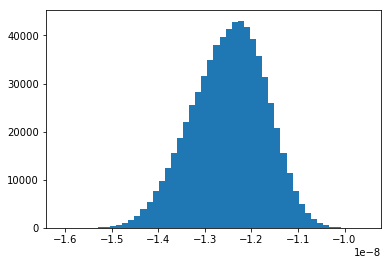

In [141]:
plt.hist(yintensity,bins=50)

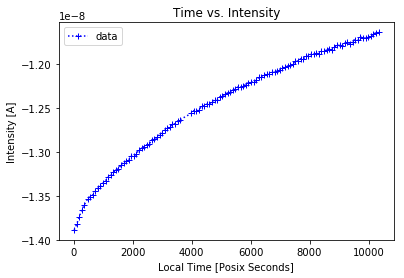

In [145]:
#plt.plot(xtime_filtered,yintensity_filtered,'b+:',label='data')
plt.errorbar(xtime_filtered,yintensity_filtered,fmt='b+:',label='data')
#plt.ylim([0,2000])
plt.legend()
#plt.xlim([-10,40]+xtime[0])
plt.title('Time vs. Intensity')
plt.ylabel('Intensity [A]')
plt.xlabel('Local Time [Posix Seconds]')
plt.show()

In [61]:
np.median(yintensity)

-1.3853e-08

In [64]:
np.std(yintensity)

5.4727286055145033e-10